# Accidentes de Tráficos en Madrid (Jerárquico)


## Descripción del DataSet


Objetivo: Realiza un análisis descriptivo del dataset. Analiza la distribución de los datos por cada una de las columnas, realiza los pasos de pre-procesamiento necesarios, justificando adecuadamente las acciones tomadas. Se deberá hacer uso de gráficas para entender los datos y las decisiones adoptadas.


In [475]:
# Importación de librerías necesarias

# Librería para manipulación y análisis de datos estructurados
import pandas as pd

# Librería para operaciones matemáticas y manipulación de arreglos numéricos.
import numpy as np

# Librería basada en matplotlib para realizar gráficos estadísticos con una interfaz más amigable.
import seaborn as sns

# Módulo de matplotlib utilizado específicamente para crear gráficos 2D.
import matplotlib.pyplot as plt

In [476]:
# Carga del conjunto de datos desde un archivo CSV
# delimiter=';': Indica que los campos en el archivo CSV están separados por punto y coma (;)
df = pd.read_csv('./data/2024_Accidentalidad.csv', delimiter=';')

### Entendimiento del DataSet


Para empezar vamos a visualizar rapidamente que forma tiene el dataset, columnas, tipos de las columnas, nulos, etc


In [477]:
# Visualizamos las 10 primeras lineas para verificar que se ha cargado todo el dataset
df.head(10)

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2023S040280,04/01/2024,14:09:00,AVDA. NICETO ALCALA ZAMORA / AUTOV. M-11,3,16,HORTALEZA,Colisión fronto-lateral,Lluvia débil,Motocicleta > 125cc,Conductor,De 55 a 59 años,Hombre,2.0,Ingreso inferior o igual a 24 horas,444913.0,4481427.0,N,NaN
1,2023S040280,04/01/2024,14:09:00,AVDA. NICETO ALCALA ZAMORA / AUTOV. M-11,3,16,HORTALEZA,Colisión fronto-lateral,Lluvia débil,Turismo,Conductor,De 55 a 59 años,Mujer,14.0,Sin asistencia sanitaria,444913.0,4481427.0,N,NaN
2,2023S040309,15/02/2024,14:05:00,CALL. TESORO / CALL. MINAS,18,1,CENTRO,Colisión fronto-lateral,Lluvia débil,Bicicleta,Conductor,De 25 a 29 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,440123.0,4475170.0,N,NaN
3,2023S040309,15/02/2024,14:05:00,CALL. TESORO / CALL. MINAS,18,1,CENTRO,Colisión fronto-lateral,Lluvia débil,Motocicleta hasta 125cc,Conductor,De 35 a 39 años,Hombre,14.0,Sin asistencia sanitaria,440123.0,4475170.0,N,NaN
4,2023S040310,18/02/2024,10:40:00,GTA. RUIZ JIMENEZ / CALL. SAN BERNARDO,3,7,CHAMBERÍ,Colisión lateral,Despejado,Turismo,Conductor,De 25 a 29 años,Hombre,NaN,NaN,440137.0,4475721.0,N,NaN
5,2023S040310,18/02/2024,10:40:00,GTA. RUIZ JIMENEZ / CALL. SAN BERNARDO,3,7,CHAMBERÍ,Colisión lateral,Despejado,Turismo,Conductor,De 55 a 59 años,Hombre,NaN,NaN,440137.0,4475721.0,N,NaN
6,2023S040312,25/02/2024,17:20:00,"CALL. PINOS ALTA, 93",93,6,TETUÁN,Colisión lateral,Despejado,Camión rígido,Conductor,De 25 a 29 años,Hombre,14.0,Sin asistencia sanitaria,440709.0,4480102.0,N,NaN
7,2023S040312,25/02/2024,17:20:00,"CALL. PINOS ALTA, 93",93,6,TETUÁN,Colisión lateral,Despejado,Maquinaria de obras,Conductor,De 50 a 54 años,Hombre,14.0,Sin asistencia sanitaria,440709.0,4480102.0,N,NaN
8,2023S040316,07/03/2024,14:25:00,CTRA. BARRIO DE LA FORTUNA / CALL. PINAR DE SA...,14,10,LATINA,Alcance,Lluvia débil,Furgoneta,Conductor,De 60 a 64 años,Hombre,NaN,NaN,433983.0,4468473.0,N,NaN
9,2023S040316,07/03/2024,14:25:00,CTRA. BARRIO DE LA FORTUNA / CALL. PINAR DE SA...,14,10,LATINA,Alcance,Lluvia débil,Turismo,Conductor,De 25 a 29 años,Hombre,NaN,NaN,433983.0,4468473.0,N,NaN


In [478]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40165 entries, 0 to 40164
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   num_expediente        40165 non-null  object 
 1   fecha                 40165 non-null  object 
 2   hora                  40165 non-null  object 
 3   localizacion          40165 non-null  object 
 4   numero                40165 non-null  object 
 5   cod_distrito          40165 non-null  int64  
 6   distrito              40165 non-null  object 
 7   tipo_accidente        40162 non-null  object 
 8   estado_meteorológico  35507 non-null  object 
 9   tipo_vehiculo         39844 non-null  object 
 10  tipo_persona          40165 non-null  object 
 11  rango_edad            40165 non-null  object 
 12  sexo                  40165 non-null  object 
 13  cod_lesividad         22336 non-null  float64
 14  lesividad             22336 non-null  object 
 15  coordenada_x_utm   

In [479]:
df.isnull().sum()

num_expediente              0
fecha                       0
hora                        0
localizacion                0
numero                      0
cod_distrito                0
distrito                    0
tipo_accidente              3
estado_meteorológico     4658
tipo_vehiculo             321
tipo_persona                0
rango_edad                  0
sexo                        0
cod_lesividad           17829
lesividad               17829
coordenada_x_utm           10
coordenada_y_utm           10
positiva_alcohol          138
positiva_droga          39995
dtype: int64

<Figure size 1280x960 with 0 Axes>

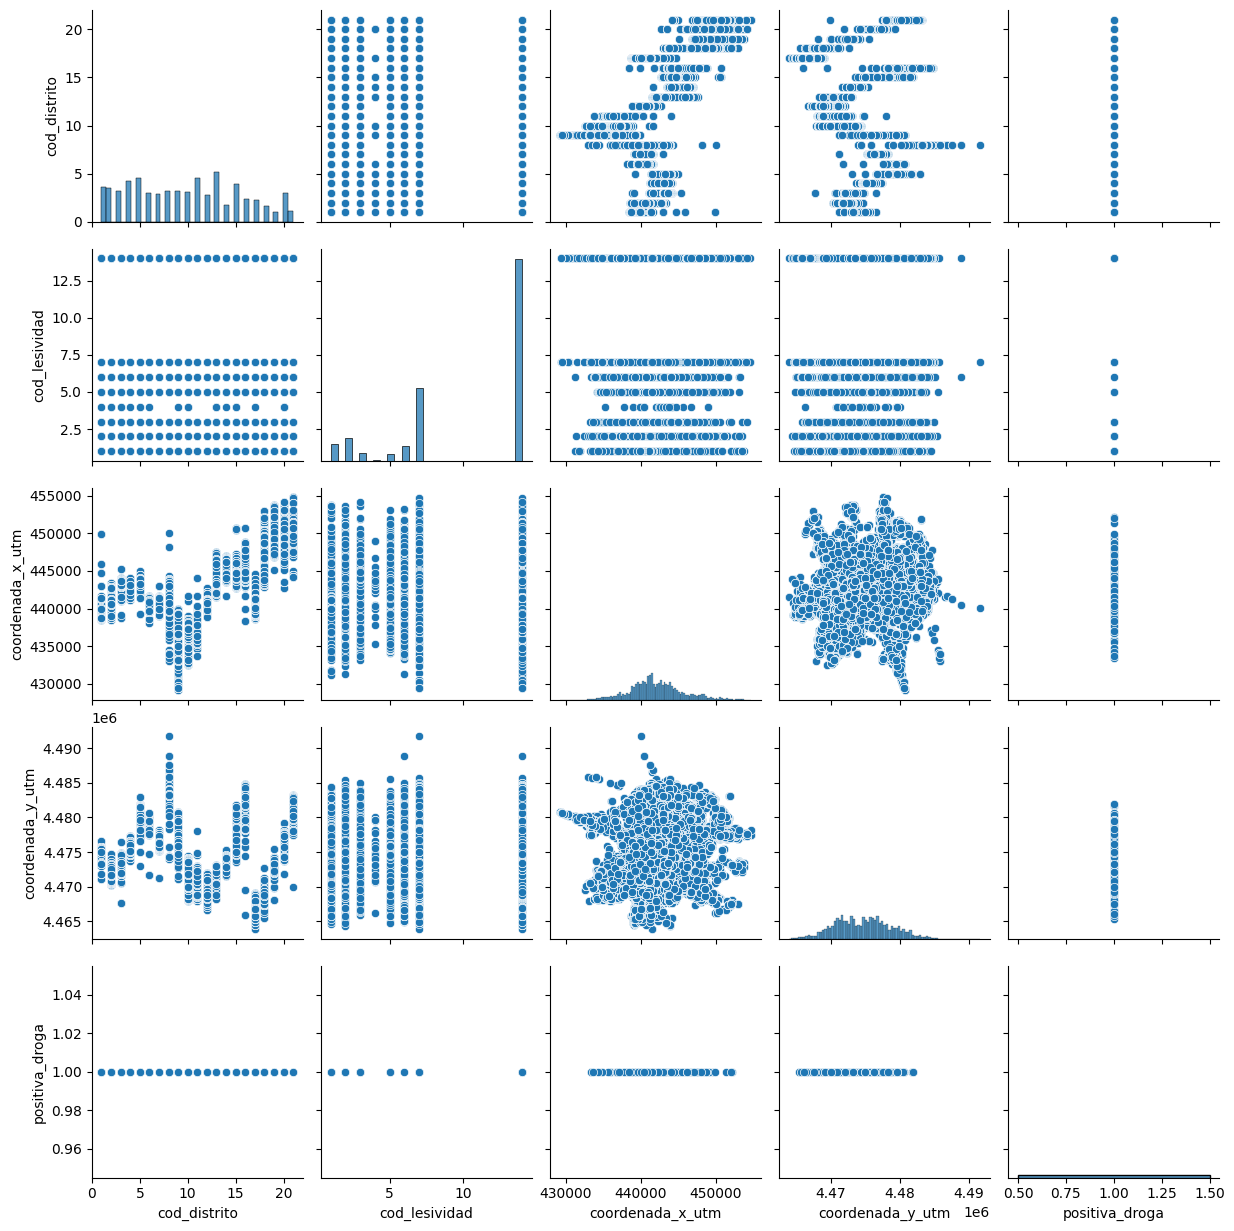

In [480]:
plt.figure(dpi=200)
sns.pairplot(df)

In [481]:
len(df['num_expediente'].unique())

16935

Analisis del dataset


https://datos.madrid.es/FWProjects/egob/Catalogo/Seguridad/Ficheros/Estructura_ConjuntoDatos_Accidentesv2.pdf


Lo primero que nos damos cuenta cuando leemos el anterior documento es que el año del accidente no viene en la fecha, si no que viene en los 4 primeros char del numero del expediente.


### Análisis de las Columnas del Dataset de Accidentes de Tráfico en Madrid

---

#### 1. `num_expediente`

-   **Descripción**: Identificador único del expediente del accidente.
-   **Formato**: Texto con estructura `AAAASNNNNNN`, donde:
    -   `AAAA`: Año del accidente.
    -   `S`: Indica que se trata de un expediente de accidente.
-   **Notas**: Es único para cada accidente y se utiliza para diferenciar registros.
-   **Posible Forma de Actuar**: Esta columna la vamos a dividir en solo el numero del expediente,

---

#### 2. `fecha`

-   **Descripción**: Fecha en la que ocurrió el accidente.
-   **Formato**: `dd/mm/aaaa`.
-   **Notas**: Permite realizar análisis temporales, como la distribución de accidentes por días o meses.
-   **Posible Forma de Actuar**:

---

#### 3. `hora`

-   **Descripción**: Hora del accidente agrupada en rangos horarios de una hora.
-   **Formato**: Hora.
-   **Notas**: Útil para identificar franjas horarias con mayor incidencia de accidentes.
-   **Posible Forma de Actuar**:

---

#### 4. `localizacion`

-   **Descripción**: Ubicación específica del accidente, indicando calles implicadas.
-   **Formato**: Texto que describe cruces o calles (e.g., "Calle 1 - Calle 2").
-   **Notas**: Permite estudiar patrones geográficos de accidentes.
-   **Posible Forma de Actuar**:

---

#### 5. `numero`

-   **Descripción**: Número de la calle donde ocurrió el accidente (si aplica).
-   **Formato**: Número entero.
-   **Notas**: Detalla una ubicación más específica dentro de una calle.
-   **Posible Forma de Actuar**:

---

#### 6. `cod_distrito`

-   **Descripción**: Código numérico del distrito municipal donde ocurrió el accidente.
-   **Formato**: Número.
-   **Notas**: Útil para análisis por distritos, como mapas de calor.
-   **Posible Forma de Actuar**:

---

#### 7. `distrito`

-   **Descripción**: Nombre del distrito municipal asociado al accidente.
-   **Formato**: Texto.
-   **Notas**: Más descriptivo que `cod_distrito`, útil para presentar resultados.
-   **Posible Forma de Actuar**:

---

#### 8. `tipo_accidente`

-   **Descripción**: Categoría del accidente según su tipología.
-   **Formato**: Texto.
-   **Valores comunes**:
    -   _Colisión doble_: Dos vehículos en movimiento.
    -   _Colisión múltiple_: Más de dos vehículos en movimiento.
    -   _Atropello a persona_: Accidente con peatón.
    -   _Choque contra obstáculo_: Colisión con un objeto inmóvil.
    -   _Caída_: Relacionada con vehículos de dos ruedas o viajeros de transporte público.
    -   _Otras causas_: Incluye despeñamientos, salidas de vía, entre otros.
-   **Posible Forma de Actuar**:

---

#### 9. `estado_meteorologico`

-   **Descripción**: Condiciones climáticas al momento del accidente.
-   **Formato**: Texto.
-   **Notas**: Permite analizar la influencia del clima en la siniestralidad.
-   **Posible Forma de Actuar**:

---

#### 10. `tipo_vehiculo`

-   **Descripción**: Tipo de vehículo implicado en el accidente.
-   **Formato**: Texto.
-   **Notas**: Útil para identificar patrones asociados a diferentes tipos de vehículos (e.g., coches, motocicletas, bicicletas).
-   **Posible Forma de Actuar**:

---

#### 11. `tipo_persona`

-   **Descripción**: Rol de la persona implicada (e.g., conductor, peatón, pasajero).
-   **Formato**: Texto.
-   **Notas**: Importante para analizar la incidencia en distintos tipos de participantes.
-   **Posible Forma de Actuar**:

---

#### 12. `rango_edad`

-   **Descripción**: Rango de edad de la persona implicada.
-   **Formato**: Texto.
-   **Notas**: Permite identificar si ciertos grupos de edad están más involucrados en accidentes.
-   **Posible Forma de Actuar**:

---

#### 13. `sexo`

-   **Descripción**: Género de la persona implicada.
-   **Formato**: `hombre`, `mujer`, o `no asignado`.
-   **Notas**: Ayuda en análisis demográficos.
-   **Posible Forma de Actuar**:

---

#### 14. `cod_lesividad` y `lesividad`

-   **Descripción**:
    -   `cod_lesividad`: Código que indica la gravedad de las lesiones.
    -   `lesividad`: Descripción textual de la gravedad.
-   **Valores comunes**:
    -   _01_: Atención en urgencias sin ingreso.
    -   _02_: Ingreso ≤ 24 horas.
    -   _03_: Ingreso > 24 horas.
    -   _04_: Fallecido en 24 horas.
    -   _05_: Asistencia ambulatoria posterior.
    -   _07_: Asistencia en el lugar.
    -   _14_: Sin asistencia sanitaria.
    -   _77_: Desconocido.
-   **Notas**: Permite analizar la gravedad y su distribución.
-   **Posible Forma de Actuar**:

---

#### 15. `coordenada_x_utm` y `coordenada_y_utm`

-   **Descripción**: Coordenadas UTM (Universal Transverse Mercator) que indican la ubicación del accidente.
-   **Formato**: Números.
-   **Notas**: Necesario para visualizaciones geográficas.
-   **Posible Forma de Actuar**:

---

#### 16. `positiva_alcohol`

-   **Descripción**: Indica si la persona implicada dio positivo en alcohol.
-   **Formato**: `S` (Sí) o `N` (No).
-   **Notas**: Útil para estudios relacionados con el consumo de alcohol.
-   **Posible Forma de Actuar**:

---

#### 17. `positiva_droga`

-   **Descripción**: Indica si la persona implicada dio positivo en drogas.
-   **Formato**: `NULL` o `1`.
-   **Notas**: Similar a `positiva_alcohol`, permite explorar correlaciones entre consumo de drogas y accidentes.
-   **Posible Forma de Actuar**:

---

#### Conclusión

El dataset está diseñado para realizar análisis descriptivos, geográficos y estadísticos sobre accidentes de tráfico. Su estructura permite explorar relaciones entre factores como ubicación, clima, tipo de accidente y severidad de las lesiones.

---


**localizacion** y **numero**: con la localizacion y el numero (numero de la calle) nos parece interesante quedarnosla, pero solo para la parte de entendimiento de los datos del cluster, ya que para el claster es mas util las coordenadas utm


para el codigo del distrito nos va a servir para hacer el cluster, pero como el numero en si no nos dice nada, pues entonces lo que vamos a hacer un mapeo del distrito para entender y tener la correlacion


para el tipo de accidente y para el estado metereologico haremos un mapeo simple de las 13 posibles variables (mapping)


en tipo de vehiculo habia demasiados valroes unicos (33) por lo que hemos intentado generalizar un poco para poder tratar con esta columna, haciendo un mapeo y un posible posterior onehotencoding


para el **rango de edad** vamos


Entendimiento del Dataset


Limpieza


Explicacion de las acciones realizadas


In [482]:
len(df['tipo_vehiculo'].unique())


33

In [483]:
df['tipo_vehiculo'].value_counts()

tipo_vehiculo
Turismo                              27406
Motocicleta hasta 125cc               2668
Furgoneta                             2667
Motocicleta > 125cc                   1469
Autobús                               1264
Camión rígido                          973
Todo terreno                           706
Bicicleta                              670
VMU eléctrico                          665
Ciclomotor                             387
Bicicleta EPAC (pedaleo asistido)      211
Tractocamión                           187
Maquinaria de obras                    151
Otros vehículos con motor              131
Vehículo articulado                     70
Autobús articulado                      69
Sin especificar                         40
Cuadriciclo ligero                      32
Autobus EMT                             17
Ciclo                                   13
Cuadriciclo no ligero                   12
Autocaravana                            11
Otros vehículos sin motor               

In [484]:
map_vehiculos = {
    'Turismo': 'Turismos y vehículos ligeros',
    'Todo terreno': 'Turismos y vehículos ligeros',
    'Autocaravana': 'Turismos y vehículos ligeros',
    'Motocicleta hasta 125cc': 'Motocicletas y ciclomotores',
    'Motocicleta > 125cc': 'Motocicletas y ciclomotores',
    'Ciclomotor': 'Motocicletas y ciclomotores',
    'Bicicleta EPAC (pedaleo asistido)': 'Motocicletas y ciclomotores',
    'Ciclomotor de tres ruedas': 'Motocicletas y ciclomotores',
    'Moto de tres ruedas hasta 125cc': 'Motocicletas y ciclomotores',
    'Moto de tres ruedas > 125cc': 'Motocicletas y ciclomotores',
    'Ciclo de motor L1e-A': 'Motocicletas y ciclomotores',
    'Ciclomotor de dos ruedas L1e-B': 'Motocicletas y ciclomotores',
    'Furgoneta': 'Vehículos de carga',
    'Camión rígido': 'Vehículos de carga',
    'Tractocamión': 'Vehículos de carga',
    'Vehículo articulado': 'Vehículos de carga',
    'Semiremolque': 'Vehículos de carga',
    'Remolque': 'Vehículos de carga',
    'Autobús': 'Vehículos de transporte público',
    'Autobús articulado': 'Vehículos de transporte público',
    'Autobus EMT': 'Vehículos de transporte público',
    'Bicicleta': 'Bicicletas y ciclos no motorizados',
    'Ciclo': 'Bicicletas y ciclos no motorizados',
    'Patinete no eléctrico': 'Bicicletas y ciclos no motorizados',
    'VMU eléctrico': 'Vehículos eléctricos ligeros',
    'Maquinaria de obras': 'Vehículos especializados',
    'Ambulancia SAMUR': 'Vehículos especializados',
    'Otros vehículos con motor': 'Vehículos especializados',
    'Otros vehículos sin motor': 'Vehículos especializados',
    'Sin especificar': 'Sin clasificar/especificar',
    'Cuadriciclo ligero': 'Sin clasificar/especificar',
    'Cuadriciclo no ligero': 'Sin clasificar/especificar'
}

In [485]:
df['tipo_vehiculo'] = df['tipo_vehiculo'].map(map_vehiculos)

Mapeo de rango de edades


In [486]:
map_edad = {
    'Desconocido': -1,
    'Menor de 5 años': 0,
    'De 6 a 9 años': 0,
    'De 10 a 14 años': 10,
    'De 15 a 17 años': 10,
    'De 18 a 20 años': 18,
    'De 21 a 24 años': 18,
    'De 25 a 29 años': 25,
    'De 30 a 34 años': 25,
    'De 35 a 39 años': 25,
    'De 40 a 44 años': 40,
    'De 45 a 49 años': 40,
    'De 50 a 54 años': 40,
    'De 55 a 59 años': 40,
    'De 60 a 64 años': 60,
    'De 65 a 69 años': 60,
    'De 70 a 74 años': 60,
    'Más de 74 años': 60
}

In [487]:
df['rango_edad'] = df['rango_edad'].map(map_edad)

In [488]:
valores_edad = df['rango_edad'].unique()


In [489]:
print(valores_edad.sort())

None


Explicación: Para simplificar y transformar esta columna, debido a que estaba definida con rangos, hemos decidido solo poner los valores con los que empieza el rango


Mapeo de estado meteorológico


In [490]:
df = df.fillna({
    'estado_meteorológico': 'Se desconoce'
})

print(df['estado_meteorológico'].unique())

map_est_met = {
    'Se Desconoce': -1,
    'Despejado': 0,
    'Nublado': 1,
    'Lluvia débil': 2,
    'LLuvia intensa': 3,
    'Granizando': 4,
    'Nevando': 5
}

df['estado_meteorológico'] = df['estado_meteorológico'].map(map_est_met)

['Lluvia débil' 'Despejado' 'Se desconoce' 'Nublado' 'LLuvia intensa'
 'Granizando' 'Nevando']


Mapeo Lesividad


In [491]:
print(df['lesividad'].unique())

['Ingreso inferior o igual a 24 horas' 'Sin asistencia sanitaria'
 'Asistencia sanitaria sólo en el lugar del accidente' nan
 'Atención en urgencias sin posterior ingreso'
 'Ingreso superior a 24 horas'
 'Asistencia sanitaria inmediata en centro de salud o mutua'
 'Asistencia sanitaria ambulatoria con posterioridad' 'Fallecido 24 horas']


In [492]:
df = df.fillna({
    'lesividad': 'Sin asistencia sanitaria',
    'cod_lesividad': 0
})

map_lesividad = {
    'Sin asistencia sanitaria': 'NONE',
    'Atención en urgencias sin posterior ingreso': 'LEVE',
    'Ingreso inferior o igual a 24 horas': 'LEVE',
    'Asistencia sanitaria ambulatoria con posterioridad': 'LEVE',
    'Asistencia sanitaria inmediata en centro de salud o mutua': 'LEVE',
    'Asistencia sanitaria sólo en el lugar del accidente': 'LEVE',
    'Ingreso inferior o igual a 24 horas': 'GRAVE',
    'Fallecido 24 horas': 'FALLECIDO'
}

In [493]:
df['lesividad'] = df['lesividad'].map(map_lesividad)

In [494]:
df['lesividad'].value_counts()

lesividad
NONE         30938
LEVE          7234
GRAVE         1494
FALLECIDO       24
Name: count, dtype: int64

Mapeo Alcohol y drogas


In [495]:
df = df.fillna({
    'positiva_droga': 0
})

map_alcohol = {
    'N': 0,
    'S': 1
}

df['positiva_alcohol'] = df['positiva_alcohol'].map(map_alcohol)

In [496]:
print('valores de positivos en alcohol: \n {} \n valores de positivos en droga: \n {}'.format(
    df['positiva_alcohol'].value_counts(),df['positiva_droga'].value_counts()
    ))

valores de positivos en alcohol: 
 positiva_alcohol
0.0    38878
1.0     1149
Name: count, dtype: int64 
 valores de positivos en droga: 
 positiva_droga
0.0    39995
1.0      170
Name: count, dtype: int64


In [497]:
df.head(10)

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2023S040280,04/01/2024,14:09:00,AVDA. NICETO ALCALA ZAMORA / AUTOV. M-11,3,16,HORTALEZA,Colisión fronto-lateral,2.0,Motocicletas y ciclomotores,Conductor,40,Hombre,2.0,GRAVE,444913.0,4481427.0,0.0,0.0
1,2023S040280,04/01/2024,14:09:00,AVDA. NICETO ALCALA ZAMORA / AUTOV. M-11,3,16,HORTALEZA,Colisión fronto-lateral,2.0,Turismos y vehículos ligeros,Conductor,40,Mujer,14.0,NONE,444913.0,4481427.0,0.0,0.0
2,2023S040309,15/02/2024,14:05:00,CALL. TESORO / CALL. MINAS,18,1,CENTRO,Colisión fronto-lateral,2.0,Bicicletas y ciclos no motorizados,Conductor,25,Hombre,7.0,LEVE,440123.0,4475170.0,0.0,0.0
3,2023S040309,15/02/2024,14:05:00,CALL. TESORO / CALL. MINAS,18,1,CENTRO,Colisión fronto-lateral,2.0,Motocicletas y ciclomotores,Conductor,25,Hombre,14.0,NONE,440123.0,4475170.0,0.0,0.0
4,2023S040310,18/02/2024,10:40:00,GTA. RUIZ JIMENEZ / CALL. SAN BERNARDO,3,7,CHAMBERÍ,Colisión lateral,0.0,Turismos y vehículos ligeros,Conductor,25,Hombre,0.0,NONE,440137.0,4475721.0,0.0,0.0
5,2023S040310,18/02/2024,10:40:00,GTA. RUIZ JIMENEZ / CALL. SAN BERNARDO,3,7,CHAMBERÍ,Colisión lateral,0.0,Turismos y vehículos ligeros,Conductor,40,Hombre,0.0,NONE,440137.0,4475721.0,0.0,0.0
6,2023S040312,25/02/2024,17:20:00,"CALL. PINOS ALTA, 93",93,6,TETUÁN,Colisión lateral,0.0,Vehículos de carga,Conductor,25,Hombre,14.0,NONE,440709.0,4480102.0,0.0,0.0
7,2023S040312,25/02/2024,17:20:00,"CALL. PINOS ALTA, 93",93,6,TETUÁN,Colisión lateral,0.0,Vehículos especializados,Conductor,40,Hombre,14.0,NONE,440709.0,4480102.0,0.0,0.0
8,2023S040316,07/03/2024,14:25:00,CTRA. BARRIO DE LA FORTUNA / CALL. PINAR DE SA...,14,10,LATINA,Alcance,2.0,Vehículos de carga,Conductor,60,Hombre,0.0,NONE,433983.0,4468473.0,0.0,0.0
9,2023S040316,07/03/2024,14:25:00,CTRA. BARRIO DE LA FORTUNA / CALL. PINAR DE SA...,14,10,LATINA,Alcance,2.0,Turismos y vehículos ligeros,Conductor,25,Hombre,0.0,NONE,433983.0,4468473.0,0.0,0.0


In [498]:
df['rango_edad'].value_counts()

rango_edad
 40    14519
 25    11600
 60     4485
-1      4316
 18     3895
 10      723
 0       627
Name: count, dtype: int64

In [499]:
df.columns

Index(['num_expediente', 'fecha', 'hora', 'localizacion', 'numero',
       'cod_distrito', 'distrito', 'tipo_accidente', 'estado_meteorológico',
       'tipo_vehiculo', 'tipo_persona', 'rango_edad', 'sexo', 'cod_lesividad',
       'lesividad', 'coordenada_x_utm', 'coordenada_y_utm', 'positiva_alcohol',
       'positiva_droga'],
      dtype='object')

In [500]:
df['cod_lesividad'].unique()

array([ 2., 14.,  7.,  0.,  1.,  3.,  6.,  5.,  4.])

In [501]:
df['cod_lesividad'] = df['cod_lesividad'].astype(int)

In [502]:
df['year'] = df['num_expediente'].astype(str).str[:4].astype(int)
df['id'] = df['num_expediente'].astype(str).str[-6:]

In [503]:
df['year'].value_counts()

year
2024    40154
2023       11
Name: count, dtype: int64

In [504]:
df = pd.get_dummies(df, columns=['tipo_persona'])

In [505]:
df.head(10)

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,...,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga,year,id,tipo_persona_Conductor,tipo_persona_Pasajero,tipo_persona_Peatón
0,2023S040280,04/01/2024,14:09:00,AVDA. NICETO ALCALA ZAMORA / AUTOV. M-11,3,16,HORTALEZA,Colisión fronto-lateral,2.0,Motocicletas y ciclomotores,...,GRAVE,444913.0,4481427.0,0.0,0.0,2023,040280,True,False,False
1,2023S040280,04/01/2024,14:09:00,AVDA. NICETO ALCALA ZAMORA / AUTOV. M-11,3,16,HORTALEZA,Colisión fronto-lateral,2.0,Turismos y vehículos ligeros,...,NONE,444913.0,4481427.0,0.0,0.0,2023,040280,True,False,False
2,2023S040309,15/02/2024,14:05:00,CALL. TESORO / CALL. MINAS,18,1,CENTRO,Colisión fronto-lateral,2.0,Bicicletas y ciclos no motorizados,...,LEVE,440123.0,4475170.0,0.0,0.0,2023,040309,True,False,False
3,2023S040309,15/02/2024,14:05:00,CALL. TESORO / CALL. MINAS,18,1,CENTRO,Colisión fronto-lateral,2.0,Motocicletas y ciclomotores,...,NONE,440123.0,4475170.0,0.0,0.0,2023,040309,True,False,False
4,2023S040310,18/02/2024,10:40:00,GTA. RUIZ JIMENEZ / CALL. SAN BERNARDO,3,7,CHAMBERÍ,Colisión lateral,0.0,Turismos y vehículos ligeros,...,NONE,440137.0,4475721.0,0.0,0.0,2023,040310,True,False,False
5,2023S040310,18/02/2024,10:40:00,GTA. RUIZ JIMENEZ / CALL. SAN BERNARDO,3,7,CHAMBERÍ,Colisión lateral,0.0,Turismos y vehículos ligeros,...,NONE,440137.0,4475721.0,0.0,0.0,2023,040310,True,False,False
6,2023S040312,25/02/2024,17:20:00,"CALL. PINOS ALTA, 93",93,6,TETUÁN,Colisión lateral,0.0,Vehículos de carga,...,NONE,440709.0,4480102.0,0.0,0.0,2023,040312,True,False,False
7,2023S040312,25/02/2024,17:20:00,"CALL. PINOS ALTA, 93",93,6,TETUÁN,Colisión lateral,0.0,Vehículos especializados,...,NONE,440709.0,4480102.0,0.0,0.0,2023,040312,True,False,False
8,2023S040316,07/03/2024,14:25:00,CTRA. BARRIO DE LA FORTUNA / CALL. PINAR DE SA...,14,10,LATINA,Alcance,2.0,Vehículos de carga,...,NONE,433983.0,4468473.0,0.0,0.0,2023,040316,True,False,False
9,2023S040316,07/03/2024,14:25:00,CTRA. BARRIO DE LA FORTUNA / CALL. PINAR DE SA...,14,10,LATINA,Alcance,2.0,Turismos y vehículos ligeros,...,NONE,433983.0,4468473.0,0.0,0.0,2023,040316,True,False,False


In [506]:
df.columns

Index(['num_expediente', 'fecha', 'hora', 'localizacion', 'numero',
       'cod_distrito', 'distrito', 'tipo_accidente', 'estado_meteorológico',
       'tipo_vehiculo', 'rango_edad', 'sexo', 'cod_lesividad', 'lesividad',
       'coordenada_x_utm', 'coordenada_y_utm', 'positiva_alcohol',
       'positiva_droga', 'year', 'id', 'tipo_persona_Conductor',
       'tipo_persona_Pasajero', 'tipo_persona_Peatón'],
      dtype='object')

In [507]:
mapeo_accidentes = {
    'NONE':0,
    'LEVE':1,
    'GRAVE':2,
    'FALLECIDO':3
}

df['lesividad'] = df['lesividad'].map(mapeo_accidentes)

In [508]:
map_tipo_accidente = {
    'Colisión fronto-lateral': 'Colision doble',
    'Alcance': 'Alcance',
    'Colisión lateral': 'Colision doble',
    'Choque contra obstáculo fijo':'Choque',
    'Atropello a persona': 'Atropello a persona',
    'Caída':'Caida',
    'Colisión múltiple':'Colision multiple',
    'Colisión frontal':'Colision doble',
    'Otro':'Otras Causas',
    'Solo salida de la vía': 'Otras Causas',
    'Vuelco': 'Vuelco',
    'Atropello a animal': 'Otras Causas'
}

df['tipo_accidente'] = df['tipo_accidente'].map(map_tipo_accidente)

In [509]:
df['hora'] = df['hora'].str.split(':').str[0].astype(int)
df['hora'].value_counts()

hora
18    2812
19    2794
14    2779
15    2703
17    2596
20    2469
13    2368
16    2214
9     2100
12    2077
21    1865
8     1817
11    1774
10    1638
22    1397
23    1237
7     1112
0      981
1      840
6      738
2      520
5      520
3      439
4      375
Name: count, dtype: int64

## Preparacion Dataframe de entrenamiento


Group by por id de accidente:

-   Id
-   Year
-   Hora a solo la hora
-   Codigo del distrito
-   Coordenada X
-   Coordenada Y
-   One Hot encoding del tipo de accidente
-   Estado meteorologico
-   Tipo vehiculo one hot encoding y suma
-   Tipo de persona one hot encoding y suma
-   Rango de edad a one hot encoding y suma
-   Lesividad la mas alta
-   Sexo one hot encoding y suma
-   Positivo en drogas y alcohol sumar el numero de positivos


In [510]:
df_entrenamiento = df

In [511]:
df_entrenamiento = df_entrenamiento.drop(columns=['num_expediente', 'fecha', 'localizacion', 'numero', 'distrito', 'lesividad'], axis=1)

In [512]:
df_entrenamiento = pd.get_dummies(df_entrenamiento, columns=['tipo_accidente', 'tipo_vehiculo', 'rango_edad', 'sexo'], dtype=int)

In [513]:
df_entrenamiento.head(10)

,hora,cod_distrito,estado_meteorológico,cod_lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga,year,id,...,rango_edad_-1,rango_edad_0,rango_edad_10,rango_edad_18,rango_edad_25,rango_edad_40,rango_edad_60,sexo_Desconocido,sexo_Hombre,sexo_Mujer
0,14,16,2.0,2,444913.0,4481427.0,0.0,0.0,2023,040280,...,0,0,0,0,0,1,0,0,1,0
1,14,16,2.0,14,444913.0,4481427.0,0.0,0.0,2023,040280,...,0,0,0,0,0,1,0,0,0,1
2,14,1,2.0,7,440123.0,4475170.0,0.0,0.0,2023,040309,...,0,0,0,0,1,0,0,0,1,0
3,14,1,2.0,14,440123.0,4475170.0,0.0,0.0,2023,040309,...,0,0,0,0,1,0,0,0,1,0
4,10,7,0.0,0,440137.0,4475721.0,0.0,0.0,2023,040310,...,0,0,0,0,1,0,0,0,1,0
5,10,7,0.0,0,440137.0,4475721.0,0.0,0.0,2023,040310,...,0,0,0,0,0,1,0,0,1,0
6,17,6,0.0,14,440709.0,4480102.0,0.0,0.0,2023,040312,...,0,0,0,0,1,0,0,0,1,0
7,17,6,0.0,14,440709.0,4480102.0,0.0,0.0,2023,040312,...,0,0,0,0,0,1,0,0,1,0
8,14,10,2.0,0,433983.0,4468473.0,0.0,0.0,2023,040316,...,0,0,0,0,0,0,1,0,1,0
9,14,10,2.0,0,433983.0,4468473.0,0.0,0.0,2023,040316,...,0,0,0,0,1,0,0,0,1,0


In [514]:
sum_col = ['tipo_persona_Conductor',
       'tipo_persona_Pasajero', 'tipo_persona_Peatón',
       'tipo_accidente_Alcance', 'tipo_accidente_Atropello a persona',
       'tipo_accidente_Caida', 'tipo_accidente_Choque',
       'tipo_accidente_Colision doble', 'tipo_accidente_Colision multiple',
       'tipo_accidente_Otras Causas', 'tipo_accidente_Vuelco',
       'tipo_vehiculo_Bicicletas y ciclos no motorizados',
       'tipo_vehiculo_Motocicletas y ciclomotores',
       'tipo_vehiculo_Sin clasificar/especificar',
       'tipo_vehiculo_Turismos y vehículos ligeros',
       'tipo_vehiculo_Vehículos de carga',
       'tipo_vehiculo_Vehículos de transporte público',
       'tipo_vehiculo_Vehículos eléctricos ligeros',
       'tipo_vehiculo_Vehículos especializados', 'rango_edad_-1',
       'rango_edad_0', 'rango_edad_10', 'rango_edad_18', 'rango_edad_25',
       'rango_edad_40', 'rango_edad_60', 'sexo_Desconocido', 'sexo_Hombre',
       'sexo_Mujer']
general_col = ['hora', 'cod_distrito', 'estado_meteorológico', 'cod_lesividad',
       'coordenada_x_utm', 'coordenada_y_utm', 'positiva_alcohol',
       'positiva_droga', 'year', 'id']

agg_dict_sum = {col: 'sum' for col in sum_col}
agg_dict_general = {col: 'first' for col in general_col}

agg_dict = {**agg_dict_general, **agg_dict_sum}

df_entrenamiento = df_entrenamiento.groupby(['id', 'year'], as_index=False).agg(agg_dict)


In [515]:
df_entrenamiento.head(10)

,,hora,cod_distrito,estado_meteorológico,cod_lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga,year,id,...,rango_edad_-1,rango_edad_0,rango_edad_10,rango_edad_18,rango_edad_25,rango_edad_40,rango_edad_60,sexo_Desconocido,sexo_Hombre,sexo_Mujer
id,year,,,,,,,,,,,,,,,,,,,,,
000001,2024,1,3,0.0,14,443927.0,4473998.0,0.0,0.0,2024,000001,...,0,0,0,1,6,2,0,0,5,4
000002,2024,2,13,0.0,0,443249.0,4471571.0,1.0,0.0,2024,000002,...,3,0,0,0,0,2,0,3,1,1
000004,2024,2,14,0.0,0,444513.0,4473729.0,0.0,0.0,2024,000004,...,0,0,0,1,0,1,0,0,0,2
000005,2024,2,11,0.0,14,436809.0,4469484.0,1.0,0.0,2024,000005,...,2,0,0,0,0,1,0,2,0,1
000010,2024,7,1,0.0,14,440193.0,4474773.0,0.0,0.0,2024,000010,...,0,0,0,0,0,2,0,0,1,1
000012,2024,8,11,NaN,0,437002.0,4470046.0,0.0,0.0,2024,000012,...,0,0,0,0,2,0,0,0,1,1
000013,2024,7,4,0.0,14,442700.0,4475970.0,0.0,0.0,2024,000013,...,0,0,0,1,1,0,0,0,2,0
000015,2024,7,7,0.0,14,441549.0,4475931.0,0.0,0.0,2024,000015,...,0,0,0,1,1,0,0,0,2,0
000018,2024,7,9,1.0,0,439703.0,4479106.0,0.0,0.0,2024,000018,...,4,0,0,0,0,0,0,4,0,0
